In [1]:
import pandas as pd
import tensorflow as tf
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('merging_data.csv')

In [3]:
df['content']

0       doyan menonton konser musik merapat ! konser m...
1       Supermodel Gigi Hadid salah vokal menyuarakan ...
2       Direktur badan intelijen pusat Amerika Serikat...
3       konser musik digelar Surabaya Desember 2023 . ...
4       Persaudaraan Alumni 212 mengundang capres cawa...
                              ...                        
1239    Hasil Periksa Fakta Fathia Islamiyatul Syahida...
1240    Ridwan Kamil menulis artikel . Tulisan kali di...
1241    Hasil Periksa Fakta Khairunnisa Andini .Tidak ...
1242    Padangbai , Kabupaten Karangasem , Bali . Kece...
1243    Sumber video > euronews : “ Gaza destroys thou...
Name: content, Length: 1244, dtype: object

In [4]:
df['headline']

0         Jadwal Konser di Jawa Timur untuk Desember 2023
1               Gigi Hadid Diserang Selebritas Pro-Israel
2         Bos CIA dan Mossad Bertemu PM Qatar, Bahas Apa?
3       10 Konser di Surabaya Desember 2023: Ada Tulus...
4       PA 212: Kami Tak Undang Capres dan Cawapres Ma...
                              ...                        
1239    Menteri Agama Yaqut Cholil Berasal dari Kelomp...
1240    Tulisan Ridwan Kamil : “NIAT BUSUK KUBU SEBELA...
1241    Video “BERITA TERBARU ~ RONALDO SUMBANGKAN GAJ...
1242           Video “Kapal oleng di pelabuhan padangbae”
1243    “Guys! Tolong Jangan Beli Cokelat Snickers” | ...
Name: headline, Length: 1244, dtype: object

In [6]:
df['headline'] + df['content']

0       Jadwal Konser di Jawa Timur untuk Desember 202...
1       Gigi Hadid Diserang Selebritas Pro-IsraelSuper...
2       Bos CIA dan Mossad Bertemu PM Qatar, Bahas Apa...
3       10 Konser di Surabaya Desember 2023: Ada Tulus...
4       PA 212: Kami Tak Undang Capres dan Cawapres Ma...
                              ...                        
1239    Menteri Agama Yaqut Cholil Berasal dari Kelomp...
1240    Tulisan Ridwan Kamil : “NIAT BUSUK KUBU SEBELA...
1241    Video “BERITA TERBARU ~ RONALDO SUMBANGKAN GAJ...
1242    Video “Kapal oleng di pelabuhan padangbae”Pada...
1243    “Guys! Tolong Jangan Beli Cokelat Snickers” | ...
Length: 1244, dtype: object

In [7]:
features = df['headline'] + df['content']
labels = df['hoax']

In [8]:
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(features, labels, train_size=.8, random_state=42)

In [9]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

In [11]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 global_max_pooling1d (Glob  (None, 16)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16109 (62.93 KB)
Trainable params: 16109 (62.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(training_padded, training_labels,
          epochs=10,
          batch_size=32,
          validation_data=(validation_padded, validation_labels))

Epoch 1/10
32/32 [==============================] - 2s 16ms/step - loss: 0.1888 - accuracy: 0.9990 - val_loss: 0.1751 - val_accuracy: 0.9960
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1457 - accuracy: 0.9990 - val_loss: 0.1381 - val_accuracy: 0.9960
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1114 - accuracy: 0.9990 - val_loss: 0.1094 - val_accuracy: 0.9960
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0851 - accuracy: 1.0000 - val_loss: 0.0872 - val_accuracy: 0.9960
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.0650 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9960
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.0589 - val_accuracy: 0.9960
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0394 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9960
Epoch 8/10
32/32 [=

In [52]:
text_data = """
entara Israel mengatakan pasukannya menembak dan membunuh tiga warganya yang menjadi sandera. Mereka menyebut keliru mengidentifikasi tiga orang itu sebagai ancaman.
"Selama pertempuran di Shejaiya (wilayah medan pertempuran di Kota Gaza), IDF (tentara) secara keliru mengidentifikasi tiga sandera Israel sebagai ancaman. Akibatnya, pasukan menembak ke arah mereka dan mereka terbunuh," kata militer dalam sebuah pernyataan, seperti dilansir Kantor Berita AFP, Sabtu (16/12/2023).

"Pelajaran langsung dari peristiwa tersebut telah dipelajari, yang kemudian diteruskan kepada seluruh pasukan IDF di lapangan," tambahnya, menyatakan "penyesalan mendalam atas insiden tragis tersebut".
"""
# Testing for predicting data
text_data = text_data.replace('=', '')
text_data = re.sub(r'\[.*?\]|\(.*?\)', '', text_data)
text_data = re.sub(r'\s+', ' ', text_data)

text_sequence = tokenizer.texts_to_sequences([text_data])
text_sequence_pad = pad_sequences(text_sequence, maxlen=max_length, truncating=trunc_type, padding=padding_type)
predict = model.predict(text_sequence_pad)
print(predict[0])

threshold = 0.4
predicted_label = 1 if predict[0] > threshold else 0
print("Prediction Label:", predicted_label)

1/1 [==============================] - 0s 30ms/step
[0.06408751]
Prediction Label: 0


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [50]:
predictions = model.predict(validation_padded)
threshold = 0.4
predicted_labels = (predictions > threshold).astype('int32')

accuracy = accuracy_score(validation_labels, predicted_labels)
precision = precision_score(validation_labels, predicted_labels)
recall = recall_score(validation_labels, predicted_labels)
f1 = f1_score(validation_labels, predicted_labels)
conf_matrix = confusion_matrix(validation_labels, predicted_labels)

# Tampilkan evaluasi dan matriks confusion
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)

8/8 [==============================] - 0s 2ms/step
Accuracy: 0.9959839357429718
Precision: 1.0
Recall: 0.9850746268656716
F1 Score: 0.9924812030075187

Confusion Matrix:
[[182   0]
 [  1  66]]


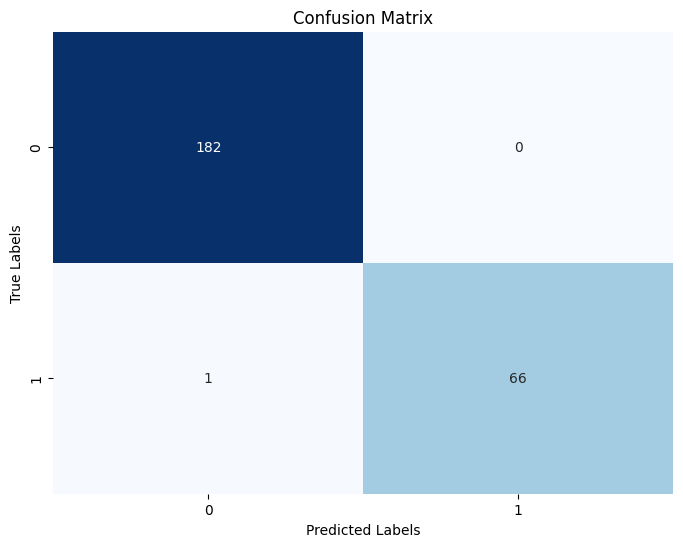

In [57]:
conf_matrix = confusion_matrix(validation_labels, predicted_labels)

# Buat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# plt.savefig('Conf Matrix')
plt.show()


**History Loss and Accuracy per Epochs Plot**

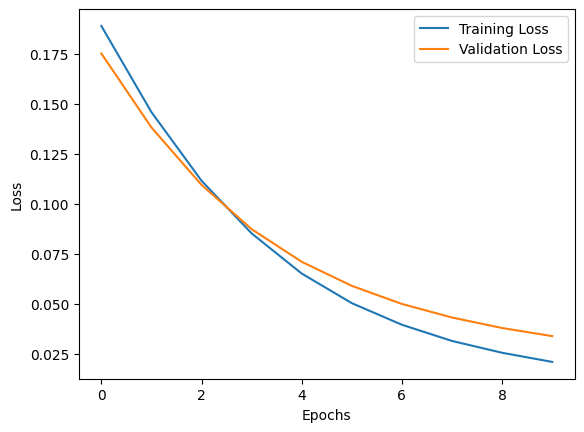

In [58]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('Loss History')
plt.show()

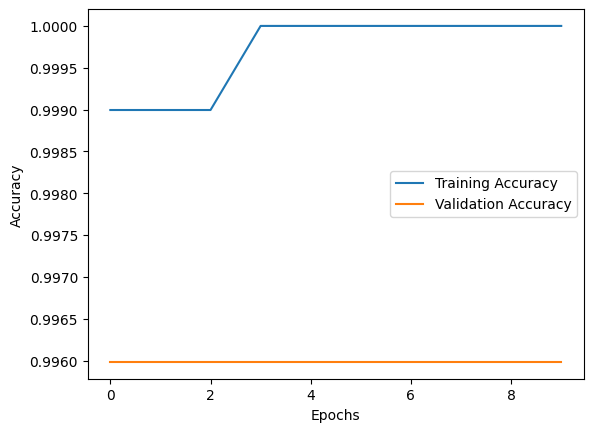

In [59]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim(0.98,1)
plt.legend()
# plt.savefig('Acc History')
plt.show()

**Model Deployment with TFLite**

In [53]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

**Model Deployment with H5**

In [55]:
model.save('model_vericheck.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
